# Regression test using Linear Neural Network

This notebook shows how to use Linear Neural Netorks to perform regression test between two variables. 

The independent variable *x* and the dependent variable *y*

In [96]:
%matplotlib inline

In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

### Generate fake data for training

To create the independent variabe *x*, we use `torch.randn`. It returns a tensor with *n* number of samples from a normally distibuted data. 

We calcuate *y* from *x* using any linear or non-linear formula we wish. Here I'm using:

y= 2.5.x^4 + x^2 - 5.x + x - 3 + random_value


Text(0, 0.5, 'Dependent Variable Y')

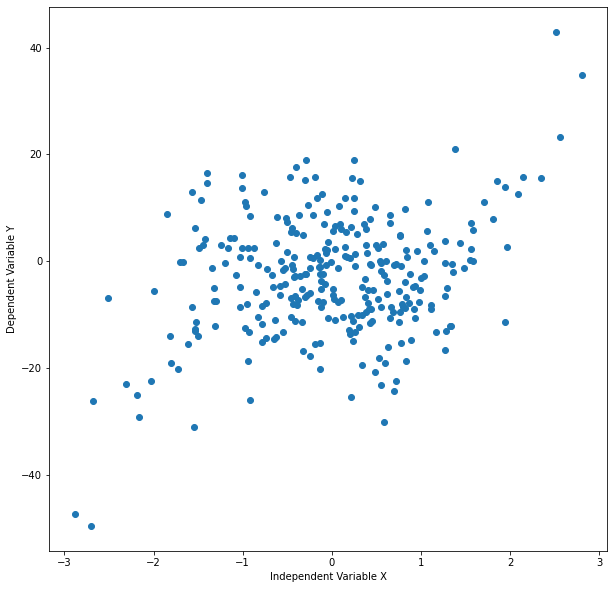

In [104]:
n= 300
torch.random.seed = 125
x = torch.randn(n)
y = 2.5 * x**3 + x**2 - 5* x - 3 + 10 * torch.randn(n)

plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('Independent Variable X')
plt.ylabel('Dependent Variable Y')

# Build the Neural Network 

I'm going to buid a simple NN with 5 linear layers, sigmoid as an activation function and batchnorm the input and hidden layers

In [105]:
class Net(nn.Module):
    def __init__(self,inputs=1, outputs=1):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(inputs, 16),
        nn.Sigmoid(),
        nn.Linear(16, outputs),
        )
        
    def forward(self,x):
        return self.layer(x)

    def learn(self,epochs,x,y,lr):
        loss_fun = nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(),lr=lr)
        losses=[]
        for epoch in range(epochs):
            optimizer.zero_grad()
            output = self(x)
            loss = loss_fun(output,y)
            losses.append(loss.item())
            loss.backward()
            if epoch%50==0:
                print("epoch:{} loss: {}".format(epoch,round(loss.item(),8)))
            optimizer.step()
        return losses
    
    @torch.no_grad()
    def predict(self,x):
        y = self(x)
        return y

net = Net(1,1)

Now we train the network for 1000 epochs and a learning rate of 1e-1

In [106]:
# Normalize the feature set before training
x_train = (x - x.mean())/x.std()
losses = net.learn(500,x_train.view(-1,1),y.view(-1,1),1e-1)

epoch:0 loss: 131.98968506
epoch:50 loss: 115.86130524
epoch:100 loss: 113.89841461
epoch:150 loss: 109.76741028
epoch:200 loss: 104.69713593
epoch:250 loss: 100.34359741
epoch:300 loss: 96.99172974
epoch:350 loss: 94.38354492
epoch:400 loss: 91.16457367
epoch:450 loss: 88.81719971


Let's plot the losses

Text(0, 0.5, 'Loss')

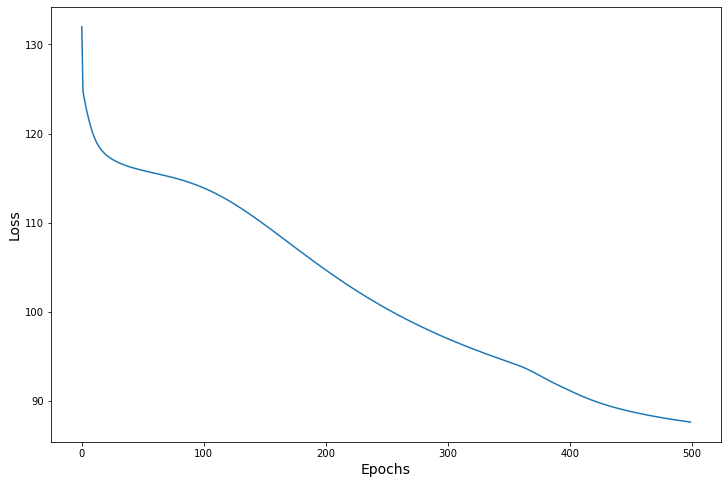

In [107]:
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)

In [108]:
y_hat= net.predict(x_train.view(-1,1))
y_hat.shape

torch.Size([300, 1])

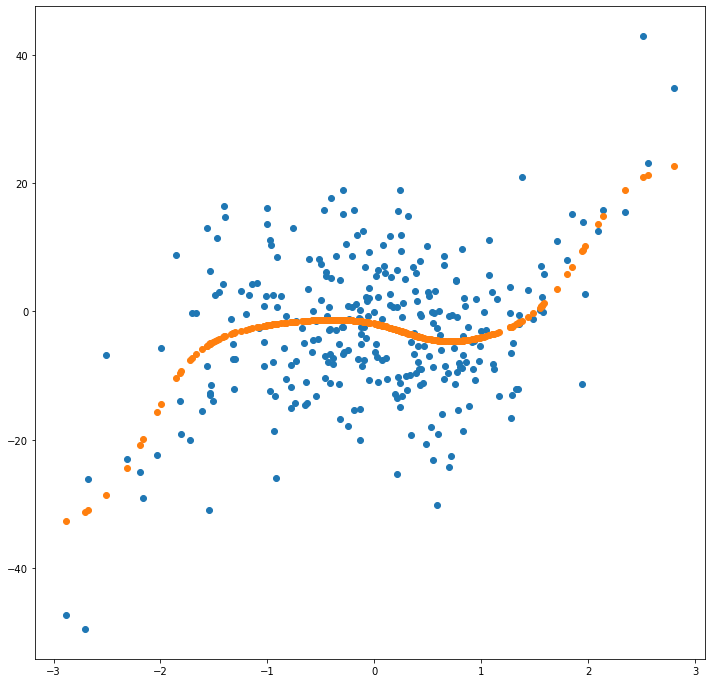

In [109]:
plt.figure(figsize=(12,12))
plt.scatter(x,y)
plt.scatter(x,y_hat)